In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [ ]:
pip install matplotlib seaborn


In [ ]:
# Import library
import pandas as pd
from google.colab import files



In [ ]:


# Upload dataset
print("Silakan unggah file Anda...")
uploaded = files.upload()




Silakan unggah file Anda...


Saving prediksi penjualan toko ritel.csv to prediksi penjualan toko ritel.csv


In [ ]:
# Mendefinisikan nama file
file_path = "prediksi penjualan toko ritel.csv"

# Pastikan nama file sesuai dengan file yang diunggah
if file_path not in uploaded:
    print(f"Error: File '{file_path}' tidak ditemukan dalam upload. Berikut file yang diunggah: {list(uploaded.keys())}")
else:
    # Load dataset ke dalam DataFrame bernama df
    df = pd.read_csv(file_path)



In [ ]:
# Setel opsi tampilan Pandas untuk menampilkan semua kolom
# Ketika nilai diatur ke None, tidak ada batasan jumlah kolom yang ditampilkan
pd.set_option('display.max_columns', None)

# Sekarang, ketika DataFrame dicetak, semua kolom akan ditampilkan tanpa terpotong

In [ ]:
# Menampilkan 10 baris pertama dari DataFrame
print(df.head(10))

   AdvertisingSpend  StoreSize  LocationScore  SeasonalityIndex  \
0          31346.84    4055.94           1.78              0.54   
1          40133.89     781.34           2.86              1.35   
2          30858.55    1972.48           7.65              1.26   
3           7873.84    4622.23           2.92              1.28   
4           3246.84    1767.91           8.91              0.94   
5          35700.04    4766.34           3.93              0.79   
6          15857.52     751.34           4.90              0.55   
7          37302.60    3797.29           4.01              1.18   
8           4172.18    2214.34           4.56              1.15   
9          46513.05    3572.71           7.89              0.92   

   CustomerSatisfaction      Sales  
0                  2.87  161193.05  
1                  2.95  161911.52  
2                  2.28  138988.97  
3                  2.28  132537.52  
4                  1.71   60462.03  
5                  3.06  222060.33  
6  

In [ ]:
##Menampilkan Semua KOLOM
df.columns

Index(['AdvertisingSpend', 'StoreSize', 'LocationScore', 'SeasonalityIndex',
       'CustomerSatisfaction', 'Sales'],
      dtype='object')

In [ ]:
##mendapatkan informasi tentang jumlah baris dan kolom dalam DataFrame df
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 2000, and columns are 6.


In [ ]:
#Fungs  i ini untuk melihat kolom dan tipe data yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AdvertisingSpend      2000 non-null   float64
 1   StoreSize             2000 non-null   float64
 2   LocationScore         2000 non-null   float64
 3   SeasonalityIndex      2000 non-null   float64
 4   CustomerSatisfaction  2000 non-null   float64
 5   Sales                 2000 non-null   float64
dtypes: float64(6)
memory usage: 93.9 KB


In [ ]:
#menampilkan jumlah nilai null pada semua kolom
df.isnull().sum()


,0
AdvertisingSpend,0
StoreSize,0
LocationScore,0
SeasonalityIndex,0
CustomerSatisfaction,0
Sales,0


**# Hasil Observasi Pertama**  
Dataset ini terdiri dari **2000 entri**, masing-masing memiliki **6 atribut deskriptif**. Semua atribut direpresentasikan sebagai data numerik (tipe data `float64`). Atribut-atribut tersebut meliputi:  

**Informasi Promosi dan Lokasi:**  
- **AdvertisingSpend:** Pengeluaran untuk iklan.  
- **StoreSize:** Ukuran toko dalam satuan tertentu.  
- **LocationScore:** Skor lokasi berdasarkan evaluasi tertentu.  
- **SeasonalityIndex:** Indeks musiman yang mencerminkan dampak musim terhadap penjualan.  

**Informasi Pelanggan dan Penjualan:**  
- **CustomerSatisfaction:** Skor kepuasan pelanggan.  
- **Sales:** Total penjualan yang dihasilkan.  

Dataset ini **tidak memiliki nilai yang hilang**, artinya semua atribut memiliki jumlah entri lengkap sebanyak 2000. Analisis lebih lanjut akan fokus pada hubungan antar atribut, pengaruh variabel terhadap penjualan, dan evaluasi kinerja berdasarkan pengeluaran promosi dan lokasi toko.

In [ ]:
#Fungsi ini untuk menghitung frekuensi kemunculan setiap nilai unik pada kolom
df['LocationScore'].value_counts()


,count
LocationScore,
2.40,10
6.69,9
1.90,9
4.66,9
4.37,7
...,...
9.43,1
3.20,1
7.00,1


In [ ]:
df['CustomerSatisfaction'].value_counts()

,count
CustomerSatisfaction,
4.23,12
4.16,12
3.29,12
2.17,11
4.55,11
...,...
2.69,1
3.49,1
1.00,1


In [ ]:
#menghasilkan statistik deskriptif dari DataFrame df Berdasarkan informasi sebelumnya, kolom discount_percentage dan rating sudah dalam tipe data numerik.
# Mengingat kolom-kolom dalam dataset ini, kolom yang relevan untuk analisis statistik deskriptif adalah:
# discounted_price
# actual_price
# discount_percentage
# rating
# rating_count
df.describe()

,AdvertisingSpend,StoreSize,LocationScore,SeasonalityIndex,CustomerSatisfaction,Sales
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,25394.282120,2771.166785,5.554120,1.004780,3.002315,146150.009450
std,14270.060343,1297.440044,2.598757,0.284104,1.166351,50176.773224
min,1068.420000,500.600000,1.000000,0.500000,1.000000,12138.610000
25%,12844.065000,1659.005000,3.360000,0.760000,1.990000,109132.080000
50%,25655.605000,2764.070000,5.550000,1.010000,2.980000,147181.580000
75%,37866.102500,3890.220000,7.790000,1.250000,4.050000,185121.687500
max,49992.280000,4998.680000,9.990000,1.500000,5.000000,278985.950000


In [ ]:
#Menampilkan Kolom yang nilainya brnilai NULL dan diurtukan bagian paling atas
df.isnull().sum().sort_values(ascending = False)

,0
AdvertisingSpend,0
StoreSize,0
LocationScore,0
SeasonalityIndex,0
CustomerSatisfaction,0
Sales,0


# Hasil Observasi Kedua
Dari analisis lebih lanjut terhadap dataset, berikut adalah temuan-temuan terkait distribusi nilai unik pada kolom tertentu:

Kolom dengan Distribusi Frekuensi

LocationScore
Kolom ini memiliki nilai berupa skor lokasi yang berpotensi diskret. Frekuensi nilai unik dari kolom ini menunjukkan distribusi yang dapat membantu memahami lokasi mana yang lebih sering muncul atau memiliki skor tertentu.
CustomerSatisfaction
Kolom ini berisi skor kepuasan pelanggan. Distribusi nilai uniknya dapat digunakan untuk mengidentifikasi tingkat kepuasan yang paling umum di antara pelanggan.
Kolom dengan Nilai Kontinu

AdvertisingSpend, StoreSize, SeasonalityIndex, dan Sales adalah kolom numerik kontinu yang memiliki variasi nilai tinggi, sehingga tidak cocok untuk analisis frekuensi kemunculan nilai unik. Namun, kolom-kolom ini dapat digunakan untuk analisis statistik deskriptif (seperti mean, median, atau korelasi).
Pola Nilai Unik

LocationScore memiliki kemungkinan nilai diskret dan terdistribusi di sekitar beberapa nilai unik tertentu. Ini bisa mencerminkan kualitas lokasi toko tertentu yang lebih dominan.
CustomerSatisfaction juga memiliki pola skor yang mencerminkan sentimen pelanggan, misalnya, tingkat kepuasan tinggi (di atas rata-rata) mungkin lebih sering muncul.
Kesimpulan
Kolom yang memiliki frekuensi kemunculan nilai unik dan relevan untuk dianalisis lebih lanjut adalah LocationScore dan CustomerSatisfaction.
Analisis berikutnya akan fokus pada pola distribusi kedua kolom ini untuk mendapatkan wawasan lebih dalam tentang pengaruhnya terhadap atribut lain, terutama Sales.

In [ ]:
df.duplicated().any()

False

In [ ]:
any_duplicates = df.duplicated(subset=['AdvertisingSpend', 'StoreSize', 'LocationScore', 'SeasonalityIndex', 'CustomerSatisfaction', 'Sales']).any()

# Data Visualization

Bar Plot untuk LocationScore dan CustomerSatisfaction:
Menampilkan frekuensi kemunculan nilai unik pada kedua kolom ini. Menggunakan sns.countplot().

Scatter Plot untuk AdvertisingSpend vs Sales:
Menampilkan hubungan antara pengeluaran iklan dan penjualan. Menggunakan sns.scatterplot().

Scatter Plot untuk LocationScore vs Sales:
Menampilkan hubungan antara skor lokasi dan penjualan. Menggunakan sns.scatterplot().

Histogram untuk Sales:
Menggambarkan distribusi dari penjualan. Menggunakan sns.histplot() dengan garis KDE (Kernel Density Estimation).

Box Plot untuk Sales:
Untuk mendeteksi adanya outlier dalam kolom Sales. Menggunakan sns.boxplot().

<ipython-input-7-feb5b005b550>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='LocationScore', palette='viridis')


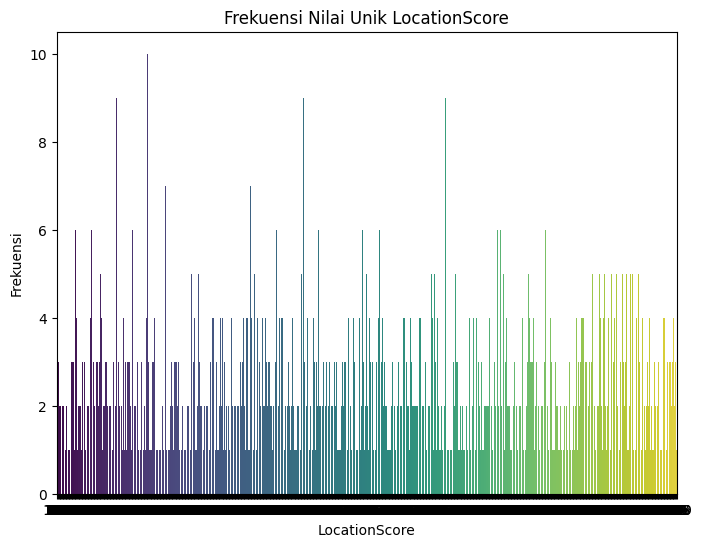

In [ ]:
# 1. Bar Plot for 'LocationScore' to show frequency of unique values
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='LocationScore', palette='viridis')
plt.title('Frekuensi Nilai Unik LocationScore')
plt.xlabel('LocationScore')
plt.ylabel('Frekuensi')
plt.show()

<ipython-input-8-e43fb31ec7fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CustomerSatisfaction', palette='coolwarm')


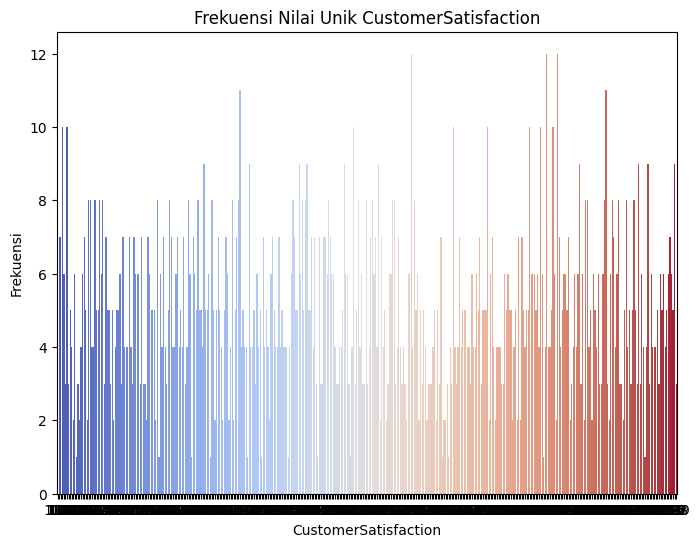

In [ ]:
# 2. Bar Plot for 'CustomerSatisfaction' to show frequency of unique values
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='CustomerSatisfaction', palette='coolwarm')
plt.title('Frekuensi Nilai Unik CustomerSatisfaction')
plt.xlabel('CustomerSatisfaction')
plt.ylabel('Frekuensi')
plt.show()

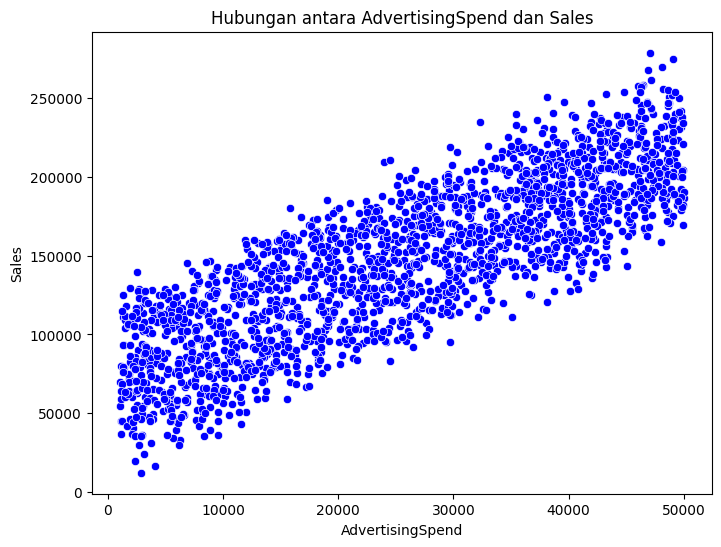

In [ ]:
# 3. Scatter Plot for 'AdvertisingSpend' vs 'Sales'
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='AdvertisingSpend', y='Sales', color='blue')
plt.title('Hubungan antara AdvertisingSpend dan Sales')
plt.xlabel('AdvertisingSpend')
plt.ylabel('Sales')
plt.show()

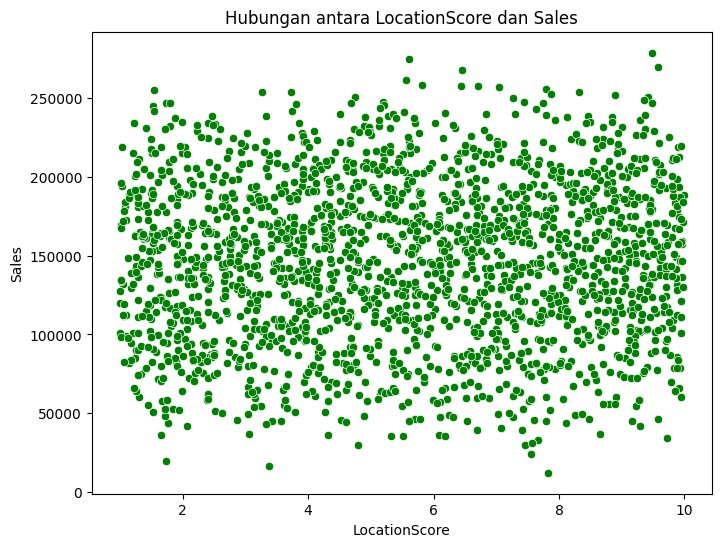

In [ ]:
# 4. Scatter Plot for 'LocationScore' vs 'Sales'
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='LocationScore', y='Sales', color='green')
plt.title('Hubungan antara LocationScore dan Sales')
plt.xlabel('LocationScore')
plt.ylabel('Sales')
plt.show()

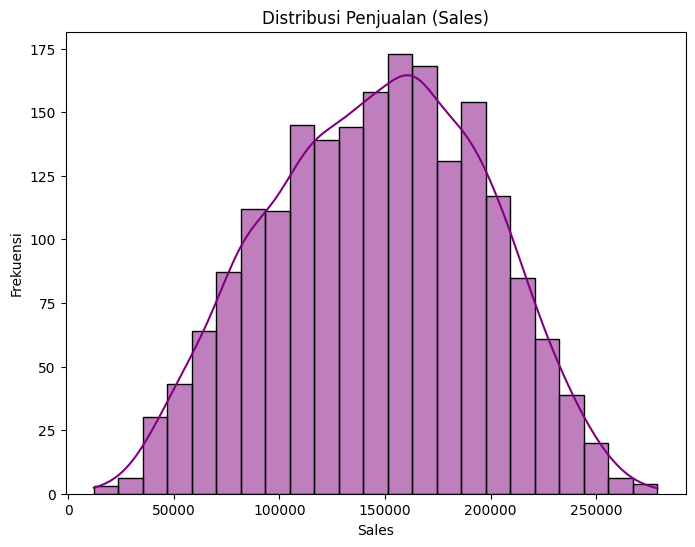

In [ ]:
# 5. Histogram for 'Sales' to see the distribution of sales
plt.figure(figsize=(8,6))
sns.histplot(df['Sales'], kde=True, color='purple')
plt.title('Distribusi Penjualan (Sales)')
plt.xlabel('Sales')
plt.ylabel('Frekuensi')
plt.show()

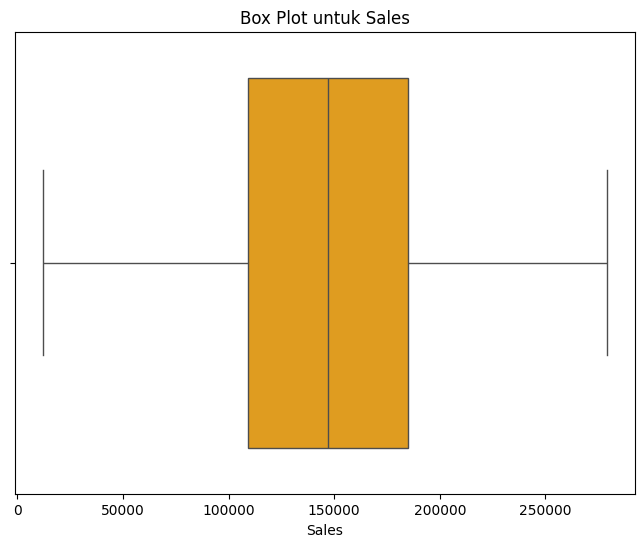

In [ ]:
# 6. Box Plot for 'Sales' to detect outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Sales', color='orange')
plt.title('Box Plot untuk Sales')
plt.xlabel('Sales')
plt.show()

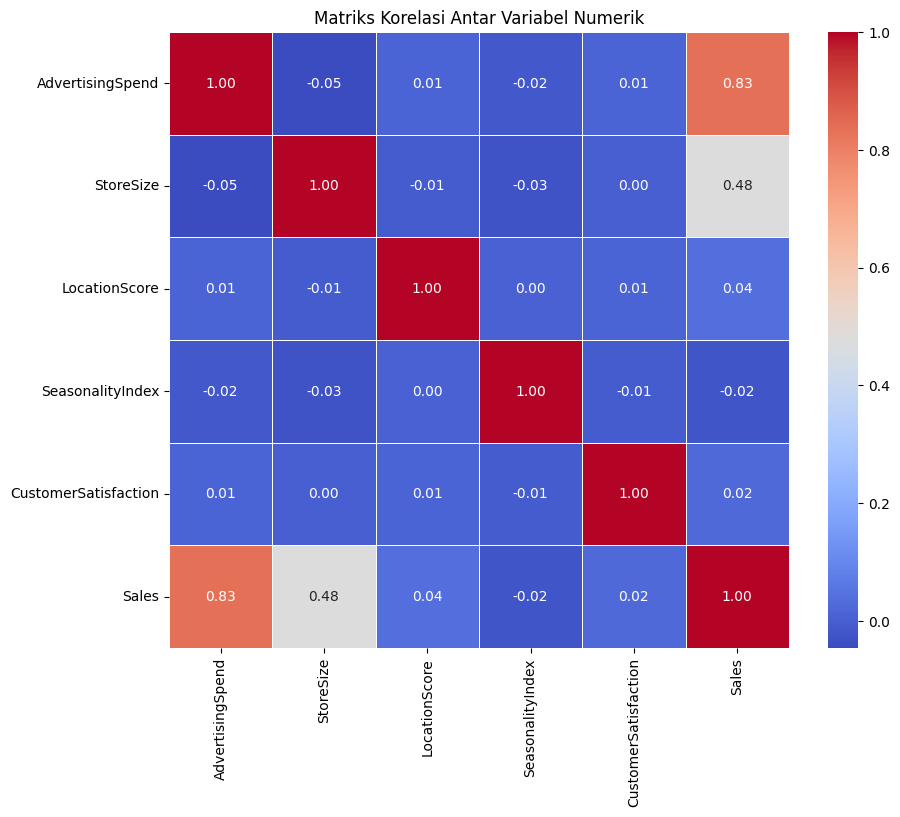

In [ ]:
# Menghitung matriks korelasi antara variabel-variabel numerik
correlation_matrix = df.corr()

# Membuat heatmap untuk matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()

df.corr()
Menghitung matriks korelasi Pearson antara variabel-variabel numerik dalam DataFrame df. Matriks korelasi ini memberikan nilai antara -1 hingga 1, yang menunjukkan seberapa kuat hubungan linear antara dua variabel.

sns.heatmap()
Digunakan untuk menampilkan matriks korelasi dalam bentuk heatmap.

annot=True: Menampilkan nilai korelasi di dalam setiap sel.
cmap='coolwarm': Warna yang digunakan untuk heatmap (dari biru untuk korelasi negatif ke merah untuk korelasi positif).
fmt='.2f': Menampilkan nilai korelasi dengan dua angka desimal.
linewidths=0.5: Menambahkan garis pembatas tipis antar sel heatmap.


Hasil:
Heatmap ini akan menunjukkan seberapa kuat hubungan antara variabel-variabel numerik (misalnya, apakah AdvertisingSpend berkorelasi positif atau negatif dengan Sales), serta pola lainnya.

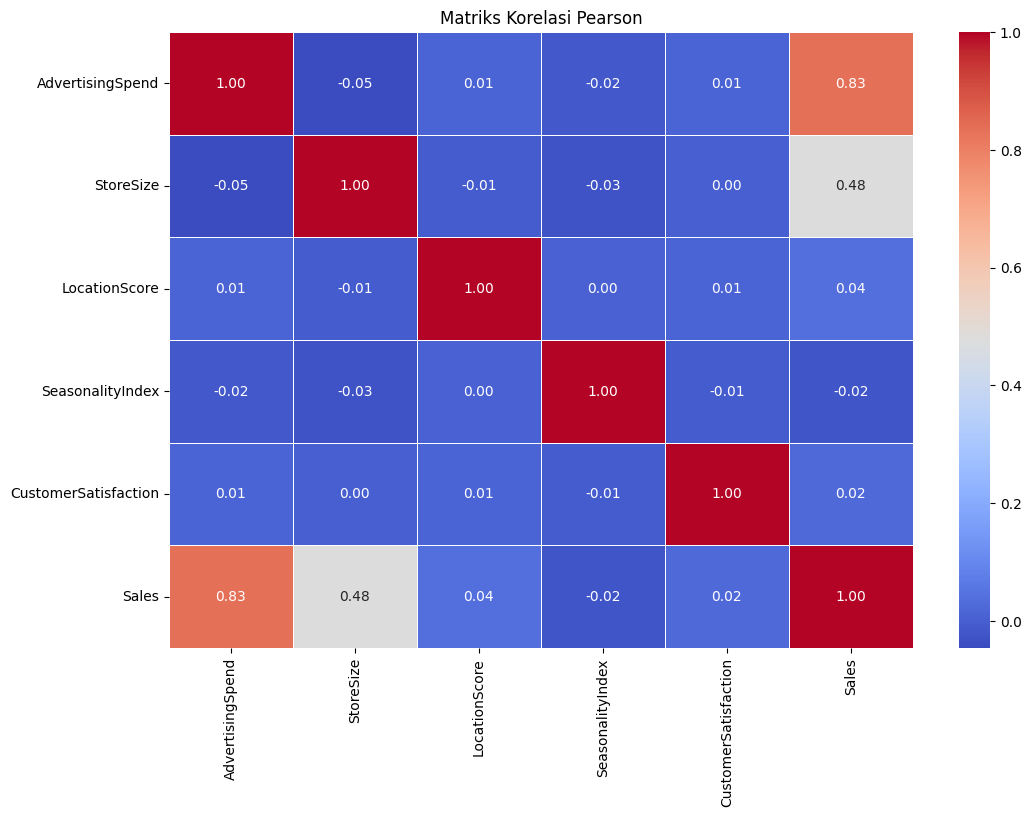

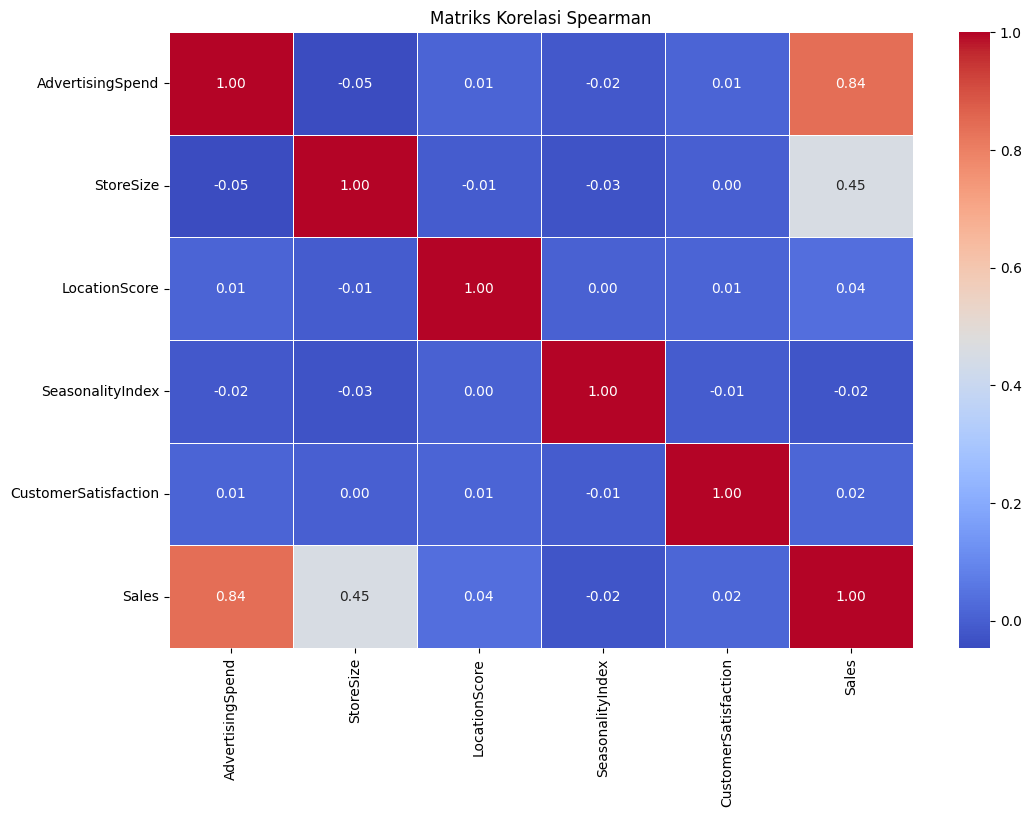

In [ ]:
# 1. Menghitung korelasi Pearson
pearson_corr = df.corr(method='pearson')

# 2. Menghitung korelasi Spearman
spearman_corr = df.corr(method='spearman')

# Visualisasi hasil korelasi Pearson dalam bentuk heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Pearson')
plt.show()

# Visualisasi hasil korelasi Spearman dalam bentuk heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Spearman')
plt.show()

df.corr(method='pearson')
Menghitung matriks korelasi Pearson antara variabel-variabel numerik dalam DataFrame df. Korelasi Pearson mengukur hubungan linear antara dua variabel. Nilai korelasi berkisar antara -1 (negatif sempurna) dan 1 (positif sempurna).

df.corr(method='spearman')
Menghitung matriks korelasi Spearman antara variabel-variabel numerik dalam DataFrame df. Korelasi Spearman mengukur hubungan monotonic (bukan hanya linear) antara dua variabel. Ini berguna ketika hubungan antara variabel tidak linier, tetapi ada kecenderungan urutan (misalnya, satu variabel lebih besar dari yang lain, tetapi tidak harus dengan perubahan yang tetap).

sns.heatmap()
Digunakan untuk memvisualisasikan matriks korelasi dalam bentuk heatmap.

annot=True: Menampilkan nilai korelasi di dalam setiap sel.
cmap='coolwarm': Warna yang digunakan untuk heatmap (dari biru untuk korelasi negatif ke merah untuk korelasi positif).
fmt='.2f': Menampilkan nilai korelasi dengan dua angka desimal.
linewidths=0.5: Menambahkan garis pembatas tipis antar sel heatmap.


Hasil:
Matriks Korelasi Pearson: Menunjukkan hubungan linear antara variabel-variabel numerik.
Matriks Korelasi Spearman: Menunjukkan hubungan monotonic (lebih fleksibel) antara variabel-variabel numerik.
Visualisasi:
Heatmap yang dihasilkan akan menampilkan dua matriks korelasi, yaitu Pearson dan Spearman, dan akan memberikan gambaran tentang seberapa kuat hubungan antara setiap pasangan variabel dalam dataset.

#Uji-t Dua Sampel Independen pada seluruh kolom numerik dalam DataFrame df dan menguji apakah ada perbedaan yang signifikan antara rata-rata antara dua kelompok,

Mengelompokkan data berdasarkan kondisi tertentu (misalnya, berdasarkan nilai StoreSize) menjadi dua grup.
Melakukan uji-t dua sampel independen pada setiap kolom numerik (seperti Sales, AdvertisingSpend, dll.).
Menyajikan hasil uji-t untuk setiap kolom.

In [ ]:
# Mengelompokkan data berdasarkan StoreSize (toko kecil dan besar)
small_stores = df[df['StoreSize'] <= 3000]
large_stores = df[df['StoreSize'] > 3000]

# Menyimpan hasil uji-t untuk setiap kolom dalam dictionary
results = {}

# Melakukan uji-t dua sampel independen untuk setiap kolom numerik
for column in df.columns:
    if column != 'StoreSize':  # Mengabaikan kolom 'StoreSize'
        # Melakukan uji-t dua sampel independen antara toko kecil dan besar untuk setiap kolom
        t_stat, p_value = stats.ttest_ind(small_stores[column], large_stores[column])
        results[column] = {'T-statistic': t_stat, 'P-value': p_value}

# Menampilkan hasil uji-t untuk setiap kolom
for column, result in results.items():
    print(f"Hasil Uji-t untuk {column}:")
    print(f"T-statistic: {result['T-statistic']}")
    print(f"P-value: {result['P-value']}")
    if result['P-value'] < 0.05:
        print("Hasil: Ada perbedaan signifikan antara dua kelompok.\n")
    else:
        print("Hasil: Tidak ada perbedaan signifikan antara dua kelompok.\n")

Hasil Uji-t untuk AdvertisingSpend:
T-statistic: 2.195782660518034
P-value: 0.02822209849655267
Hasil: Ada perbedaan signifikan antara dua kelompok.

Hasil Uji-t untuk LocationScore:
T-statistic: -0.6262680727048401
P-value: 0.5312106633446279
Hasil: Tidak ada perbedaan signifikan antara dua kelompok.

Hasil Uji-t untuk SeasonalityIndex:
T-statistic: -0.07473095756925681
P-value: 0.9404362570279059
Hasil: Tidak ada perbedaan signifikan antara dua kelompok.

Hasil Uji-t untuk CustomerSatisfaction:
T-statistic: 0.22801727315267745
P-value: 0.8196561438832781
Hasil: Tidak ada perbedaan signifikan antara dua kelompok.

Hasil Uji-t untuk Sales:
T-statistic: -19.763418270485943
P-value: 1.4949363730426687e-79
Hasil: Ada perbedaan signifikan antara dua kelompok.



Pengelompokan Data:
Data dikelompokkan berdasarkan ukuran toko (StoreSize). Toko dengan ukuran lebih kecil dari atau sama dengan 3000 dianggap sebagai "kecil", sedangkan yang lebih besar dianggap sebagai "besar".
Uji-t Dua Sampel Independen:
Uji-t dilakukan pada setiap kolom numerik (selain StoreSize) untuk membandingkan rata-rata antara dua grup, yaitu toko kecil dan toko besar. Fungsi stats.ttest_ind() digunakan untuk menghitung t-statistic dan p-value.


Menampilkan Hasil:
Untuk setiap kolom, hasil uji-t (t-statistic dan p-value) dicetak, dan dilakukan interpretasi berdasarkan nilai p-value:
Jika p-value < 0.05, kita menyimpulkan bahwa ada perbedaan signifikan antara rata-rata dua kelompok.
Jika p-value ≥ 0.05, kita menyimpulkan bahwa tidak ada perbedaan signifikan antara rata-rata dua kelompok.


Hasil yang Diharapkan:
Hasil yang dilihat adalah t-statistic dan p-value untuk setiap kolom, bersama dengan interpretasi apakah ada perbedaan signifikan antara toko kecil dan besar berdasarkan nilai p-value.

Catatan:
Tingkat Signifikansi (α) yang digunakan adalah 0.05, yang berarti kita akan menolak hipotesis nol jika p-value lebih kecil dari 0.05.
bisa menyesuaikan kriteria pengelompokan (misalnya, ukuran toko) atau kolom yang dianalisis sesuai kebutuhan.

# Uji-t Berpasangan dan Uji-t Satu Sampel pada dataset df.

1. Uji-t Berpasangan (Paired T-Test)
Uji-t berpasangan digunakan ketika  ingin membandingkan dua set data yang saling berhubungan. Contohnya, jika  memiliki data sebelum dan sesudah suatu perlakuan (misalnya, membandingkan penjualan sebelum dan setelah kampanye iklan),  akan menggunakan uji-t berpasangan.

Contoh Kasus:
membandingkan rata-rata Sales pada dua kondisi berbeda dalam data yang sama, misalnya, sebelum dan sesudah kampanye iklan (misalnya, AdvertisingSpend).

2. Uji-t Satu Sampel (One-Sample T-Test)
Uji-t satu sampel digunakan untuk menguji apakah rata-rata dari satu sampel berbeda secara signifikan dari nilai tertentu.

In [ ]:
# ===========================
# 1. Uji-t Berpasangan (Paired T-Test)
# ===========================
# Misalnya kita ingin menguji apakah ada perbedaan rata-rata antara AdvertisingSpend dan Sales
t_stat_paired, p_value_paired = stats.ttest_rel(df['AdvertisingSpend'], df['Sales'])

# Menampilkan hasil uji-t berpasangan
print("Hasil Uji-t Berpasangan:")
print(f"T-statistic: {t_stat_paired}")
print(f"P-value: {p_value_paired}")
if p_value_paired < 0.05:
    print("Hasil: Ada perbedaan signifikan antara rata-rata AdvertisingSpend dan Sales.\n")
else:
    print("Hasil: Tidak ada perbedaan signifikan antara rata-rata AdvertisingSpend dan Sales.\n")


# ============================
# 2. Uji-t Satu Sampel (One-Sample T-Test)
# ============================
# Misalnya kita ingin menguji apakah rata-rata Sales lebih besar dari 150.000
target_sales = 150000
t_stat_one_sample, p_value_one_sample = stats.ttest_1samp(df['Sales'], target_sales)

# Menampilkan hasil uji-t satu sampel
print("Hasil Uji-t Satu Sampel:")
print(f"T-statistic: {t_stat_one_sample}")
print(f"P-value: {p_value_one_sample}")
if p_value_one_sample < 0.05:
    print("Hasil: Rata-rata Sales secara signifikan berbeda dari target 150,000.\n")
else:
    print("Hasil: Rata-rata Sales tidak berbeda signifikan dari target 150,000.\n")

Hasil Uji-t Berpasangan:
T-statistic: -138.10801431861825
P-value: 0.0
Hasil: Ada perbedaan signifikan antara rata-rata AdvertisingSpend dan Sales.

Hasil Uji-t Satu Sampel:
T-statistic: -3.4314046238326728
P-value: 0.0006126768765727537
Hasil: Rata-rata Sales secara signifikan berbeda dari target 150,000.



Uji-t Berpasangan (Paired T-Test):

stats.ttest_rel(df['AdvertisingSpend'], df['Sales']): Uji-t berpasangan digunakan untuk membandingkan dua kolom dalam DataFrame yang saling berhubungan (misalnya, AdvertisingSpend dan Sales). Hasilnya adalah t-statistic dan p-value, yang digunakan untuk menguji apakah ada perbedaan yang signifikan antara kedua kolom.
Uji-t Satu Sampel (One-Sample T-Test):

stats.ttest_1samp(df['Sales'], target_sales): Uji-t satu sampel digunakan untuk menguji apakah rata-rata Sales berbeda signifikan dari nilai target (misalnya, 150.000). Fungsi ini membandingkan nilai rata-rata dari kolom Sales dengan nilai target yang diberikan.
Interpretasi Hasil:

T-statistic: Mengukur seberapa besar perbedaan antara kelompok dibandingkan dengan variasi dalam data.
P-value: Jika p-value < 0.05, kita menolak hipotesis nol dan menyimpulkan bahwa ada perbedaan yang signifikan.
Kriteria Interpretasi:

Jika p-value < 0.05, hasilnya signifikan (kita menolak hipotesis nol).
Jika p-value ≥ 0.05, hasilnya tidak signifikan (kita gagal menolak hipotesis nol).


Hasil yang Diharapkan:
Uji-t Berpasangan:
mengetahui apakah ada perbedaan signifikan antara pengeluaran iklan dan penjualan.
Uji-t Satu Sampel:
mengetahui apakah rata-rata penjualan berbeda signifikan dari nilai target 150.000.

#Tabel kontingensi (atau tabel silang) digunakan untuk menganalisis hubungan antara dua variabel kategorikal. Tabel ini menunjukkan frekuensi kombinasi setiap kategori dari dua variabel yang dipertimbangkan.

Contoh Kasus:
Misalnya,  seperti StoreSize yang bisa dikategorikan dalam "kecil" atau "besar" dan SeasonalityIndex yang dapat dikategorikan dalam beberapa tingkatan.

In [ ]:
# Kategorikan StoreSize menjadi "Kecil" atau "Besar"
df['StoreSizeCategory'] = ['Besar' if x > 3000 else 'Kecil' for x in df['StoreSize']]

# Kategorikan SeasonalityIndex menjadi "Tinggi", "Sedang", dan "Rendah"
df['SeasonalityCategory'] = ['Tinggi' if x > 1.2 else 'Sedang' if x > 0.8 else 'Rendah' for x in df['SeasonalityIndex']]

# Membuat tabel kontingensi antara StoreSizeCategory dan SeasonalityCategory
contingency_table = pd.crosstab(df['StoreSizeCategory'], df['SeasonalityCategory'])

# Menampilkan tabel kontingensi
print(contingency_table)

SeasonalityCategory  Rendah  Sedang  Tinggi
StoreSizeCategory                          
Besar                   261     368     268
Kecil                   320     439     344




*  Kategorisasi Data:
StoreSizeCategory: Kolom ini mengklasifikasikan StoreSize menjadi "Besar" jika nilai StoreSize lebih besar dari 3000, dan "Kecil" jika tidak.
SeasonalityCategory: Kolom ini mengklasifikasikan SeasonalityIndex menjadi "Tinggi", "Sedang", atau "Rendah" berdasarkan nilai tertentu.

*   Membuat Tabel Kontingensi:
pd.crosstab(df['StoreSizeCategory'], df['SeasonalityCategory']): Fungsi crosstab() membuat tabel kontingensi yang menunjukkan jumlah frekuensi kombinasi kategori dari dua kolom (dalam hal ini StoreSizeCategory dan SeasonalityCategory).
Hasil Tabel Kontingensi:
Hasil tabel akan menunjukkan berapa banyak toko dengan kategori "Besar" atau "Kecil" yang memiliki SeasonalityIndex dalam kategori "Tinggi", "Sedang", atau "Rendah"



**menambahkan pengujian statistik seperti Chi-Square Test untuk menguji apakah ada hubungan signifikan antara dua variabel iniext**

In [ ]:
# Menghitung uji Chi-Square untuk tabel kontingensi
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Menampilkan hasil uji Chi-Square
print(f"Chi-Square Stat: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpretasi hasil
if p_val < 0.05:
    print("Ada hubungan signifikan antara StoreSizeCategory dan SeasonalityCategory.")
else:
    print("Tidak ada hubungan signifikan antara StoreSizeCategory dan SeasonalityCategory.")

Chi-Square Stat: 0.4628048587231634
P-value: 0.7934201062328547
Degrees of Freedom: 2
Expected Frequencies: 
[[260.5785 361.9395 274.482 ]
 [320.4215 445.0605 337.518 ]]
Tidak ada hubungan signifikan antara StoreSizeCategory dan SeasonalityCategory.




*   stats.chi2_contingency(contingency_table): Fungsi ini melakukan uji Chi-Square pada tabel kontingensi dan memberikan nilai statistik Chi-Square, p-value, derajat kebebasan, dan frekuensi yang diharapkan.


*  Interpretasi: Jika p-value < 0.05, kita dapat menyimpulkan bahwa ada hubungan signifikan antara kedua variabel kategorikal.



## **# Analisis Deskriptif dan Analisis Eksploratif**
Analisis deskriptif dan eksploratif yang dapat diterapkan pada studi kasus  yang berkaitan dengan dataset AdvertisingSpend, StoreSize, LocationScore, SeasonalityIndex, CustomerSatisfaction, dan Sales

**Q1: Berapa rata-rata Sales untuk setiap kategori StoreSize?**

In [ ]:
# Membuat kolom StoreSizeCategory berdasarkan kategori StoreSize
df['StoreSizeCategory'] = ['Besar' if x > 3000 else 'Kecil' for x in df['StoreSize']]


In [ ]:
# Mengelompokkan StoreSizeCategory dan menghitung rata-rata Sales
avg_sales_by_storesize = df.groupby('StoreSizeCategory')['Sales'].mean()

print("Rata-rata Sales berdasarkan kategori StoreSize:")
print(avg_sales_by_storesize)


Rata-rata Sales berdasarkan kategori StoreSize:
StoreSizeCategory
Besar    168644.526566
Kecil    127856.644216
Name: Sales, dtype: float64


**Q2: Apa kategori StoreSize dengan penjualan (Sales) tertinggi?**

In [ ]:
# Cari kategori StoreSize dengan penjualan tertinggi
highest_sales_store_size = df.groupby('StoreSizeCategory')['Sales'].sum().idxmax()

print(f"Kategori StoreSize dengan penjualan tertinggi: {highest_sales_store_size}")


Kategori StoreSize dengan penjualan tertinggi: Besar


**Q3: Bagaimana distribusi nilai pengeluaran iklan (AdvertisingSpend) dibandingkan dengan penjualan (Sales)?**

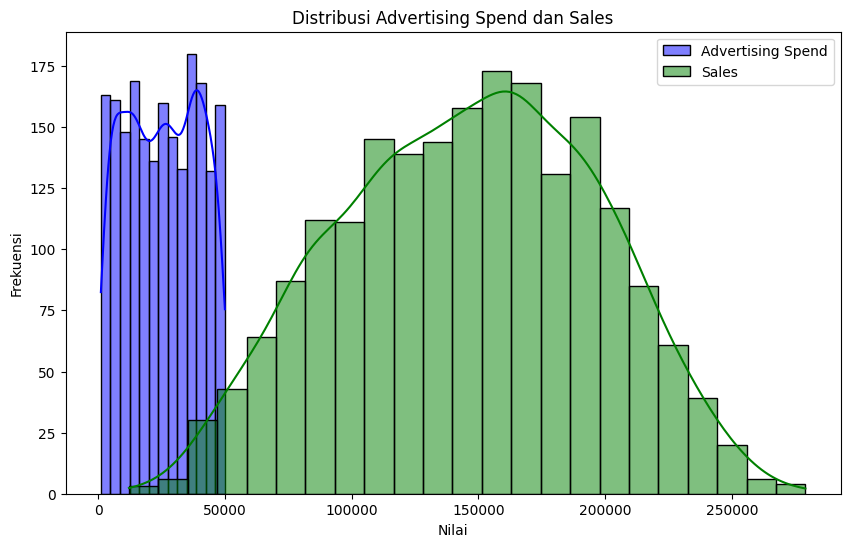

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram untuk AdvertisingSpend dan Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['AdvertisingSpend'], color='blue', kde=True, label='Advertising Spend')
sns.histplot(df['Sales'], color='green', kde=True, label='Sales')
plt.title("Distribusi Advertising Spend dan Sales")
plt.xlabel("Nilai")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()


**Q4: Bagaimana rata-rata LocationScore bervariasi di setiap kategori Seasonality?**

In [ ]:
# Menghitung rata-rata CustomerSatisfaction berdasarkan StoreSizeCategory
avg_satisfaction_by_storesize = df.groupby('StoreSizeCategory')['CustomerSatisfaction'].mean()

print("Rata-rata CustomerSatisfaction berdasarkan kategori StoreSize:")
print(avg_satisfaction_by_storesize)


Rata-rata CustomerSatisfaction berdasarkan kategori StoreSize:
StoreSizeCategory
Besar    2.995719
Kecil    3.007679
Name: CustomerSatisfaction, dtype: float64


**Q5: Apa toko dengan CustomerSatisfaction tertinggi?**

In [ ]:
# Cari toko dengan CustomerSatisfaction tertinggi
highest_satisfaction_index = df['CustomerSatisfaction'].idxmax()
highest_satisfaction_store = df.loc[highest_satisfaction_index]

print("Toko dengan Customer Satisfaction tertinggi:")
print(highest_satisfaction_store)


Toko dengan Customer Satisfaction tertinggi:
AdvertisingSpend         21501.36
StoreSize                  2682.1
LocationScore                3.23
SeasonalityIndex             1.02
CustomerSatisfaction          5.0
Sales                   125669.26
StoreSizeCategory           Kecil
Name: 631, dtype: object


**Q6: Apa hubungan antara pengeluaran iklan (AdvertisingSpend) dan penjualan (Sales)?**

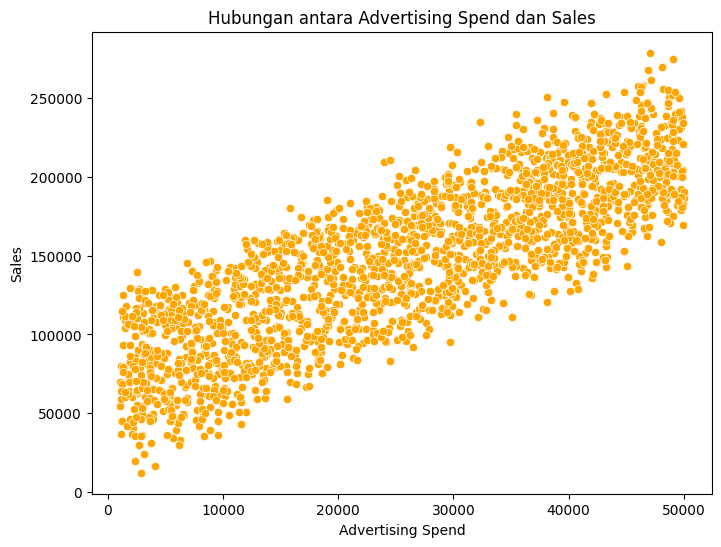

Korelasi antara Advertising Spend dan Sales: 0.8326115956193315


In [ ]:
# Scatter plot antara AdvertisingSpend dan Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['AdvertisingSpend'], y=df['Sales'], color='orange')
plt.title("Hubungan antara Advertising Spend dan Sales")
plt.xlabel("Advertising Spend")
plt.ylabel("Sales")
plt.show()

# Korelasi antara AdvertisingSpend dan Sales
correlation = df['AdvertisingSpend'].corr(df['Sales'])

print(f"Korelasi antara Advertising Spend dan Sales: {correlation}")


**Q7: Berapa korelasi antara AdvertisingSpend dan Sales?**

In [ ]:
# Menghitung korelasi antara AdvertisingSpend dan Sales
correlation = df['AdvertisingSpend'].corr(df['Sales'])

print(f"Korelasi antara AdvertisingSpend dan Sales: {correlation}")


Korelasi antara AdvertisingSpend dan Sales: 0.8326115956193315


Hasil korelasi 0.8326 menunjukkan bahwa terdapat korelasi positif yang kuat antara AdvertisingSpend dan Sales. Ini berarti bahwa semakin besar pengeluaran untuk iklan (AdvertisingSpend), semakin besar pula penjualan (Sales) yang dihasilkan, meskipun korelasi ini tidak berarti kausalitas.

**Kesimpulan Analisis**



*   Q1, Q4, membantu memahami pola dan tren penjualan berdasarkan kategori StoreSize.
*   Q2 dan Q5 memberikan wawasan tentang kategori dengan performa terbaik dalam hal kepuasan pelanggan dan penjualan.


*   Q3 membantu membandingkan distribusi data AdvertisingSpend dan Sales.
*   Q8 mengukur hubungan antara pengeluaran iklan dan penjualan.





# **TAHAP EDA SELESAI**